In [1]:
import pandas as pd
import numpy as np
import pickle
import spacy
#pip install spacy  #uncomment first time # in env!!!

Перенесу в env!!!

In [2]:
#!pip install spacy #uncomment first time 

In [3]:
#!python -m spacy download ru_core_news_sm  #uncomment first time 

Загрузили русскую модель из spaCy

In [4]:
nlp = spacy.load('ru_core_news_sm')

Выделили отдельно массив текстовых описаний

## Эксперимент со 100 самыми насыщенными классами

In [5]:
table_2_10_6 = pd.read_pickle('top_100_class_200k.pickle')


In [6]:
table_2_10_6.head()

,text,OKPD2
0,Ремкомплект КАМАЗ-ЕВРО теплообменника масляног...,29.32.30.390
1,"Трубка топливная КАМАЗ,УРАЛ,ПАЗ,ЛИАЗ от ЭМК к ...",29.32.30.390
2,"9602,3709 Переключатель указателей по...",29.32.30.390
3,Блок управления двигателя,29.32.30.390
4,Облицовка буфера КАМАЗ-65115 (рестайлинг) узка...,29.32.30.390


In [7]:
text = list(table_2_10_6['text'])

Построение эмбеддингов по текстовым описаниям

In [8]:
import time
start_time = time.time()

embeddings = [nlp(stat).vector for stat in text]
print("--- %s seconds ---" % (time.time() - start_time))

--- 1492.1783378124237 seconds ---


Создание массива меток (оставляем только первые 4 цифры классификатора)

In [44]:
labels = np.array( [int(''.join(code.split('.'))) for code in table_2_10_6['OKPD2']] )

In [45]:
#labels = np.array(table_2_10_6['new_code'])
labels

array([293230390, 293230390, 293230390, ..., 281412110, 281412110,
       281412110])

Разбиение выборки на train и test

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

Лог регрессия из sklearn

In [47]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 626.4092409610748 seconds ---


Построение ROC кривой

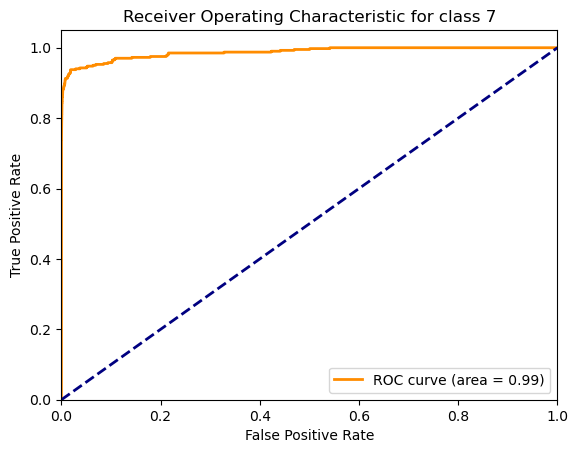

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Бинаризация меток для многоклассовой классификации
y_test_binarized = label_binarize(y_test, classes=np.unique(labels))

# Предсказание вероятностей для всех классов
y_score = model.predict_proba(X_test)

# Вычисление ROC AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]-1):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i-1], y_score[:, i-1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение ROC-кривой для первого класса
plt.figure()
class_number =7
plt.plot(fpr[class_number], tpr[class_number], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[class_number])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for class 7')
plt.legend(loc="lower right")
plt.show()


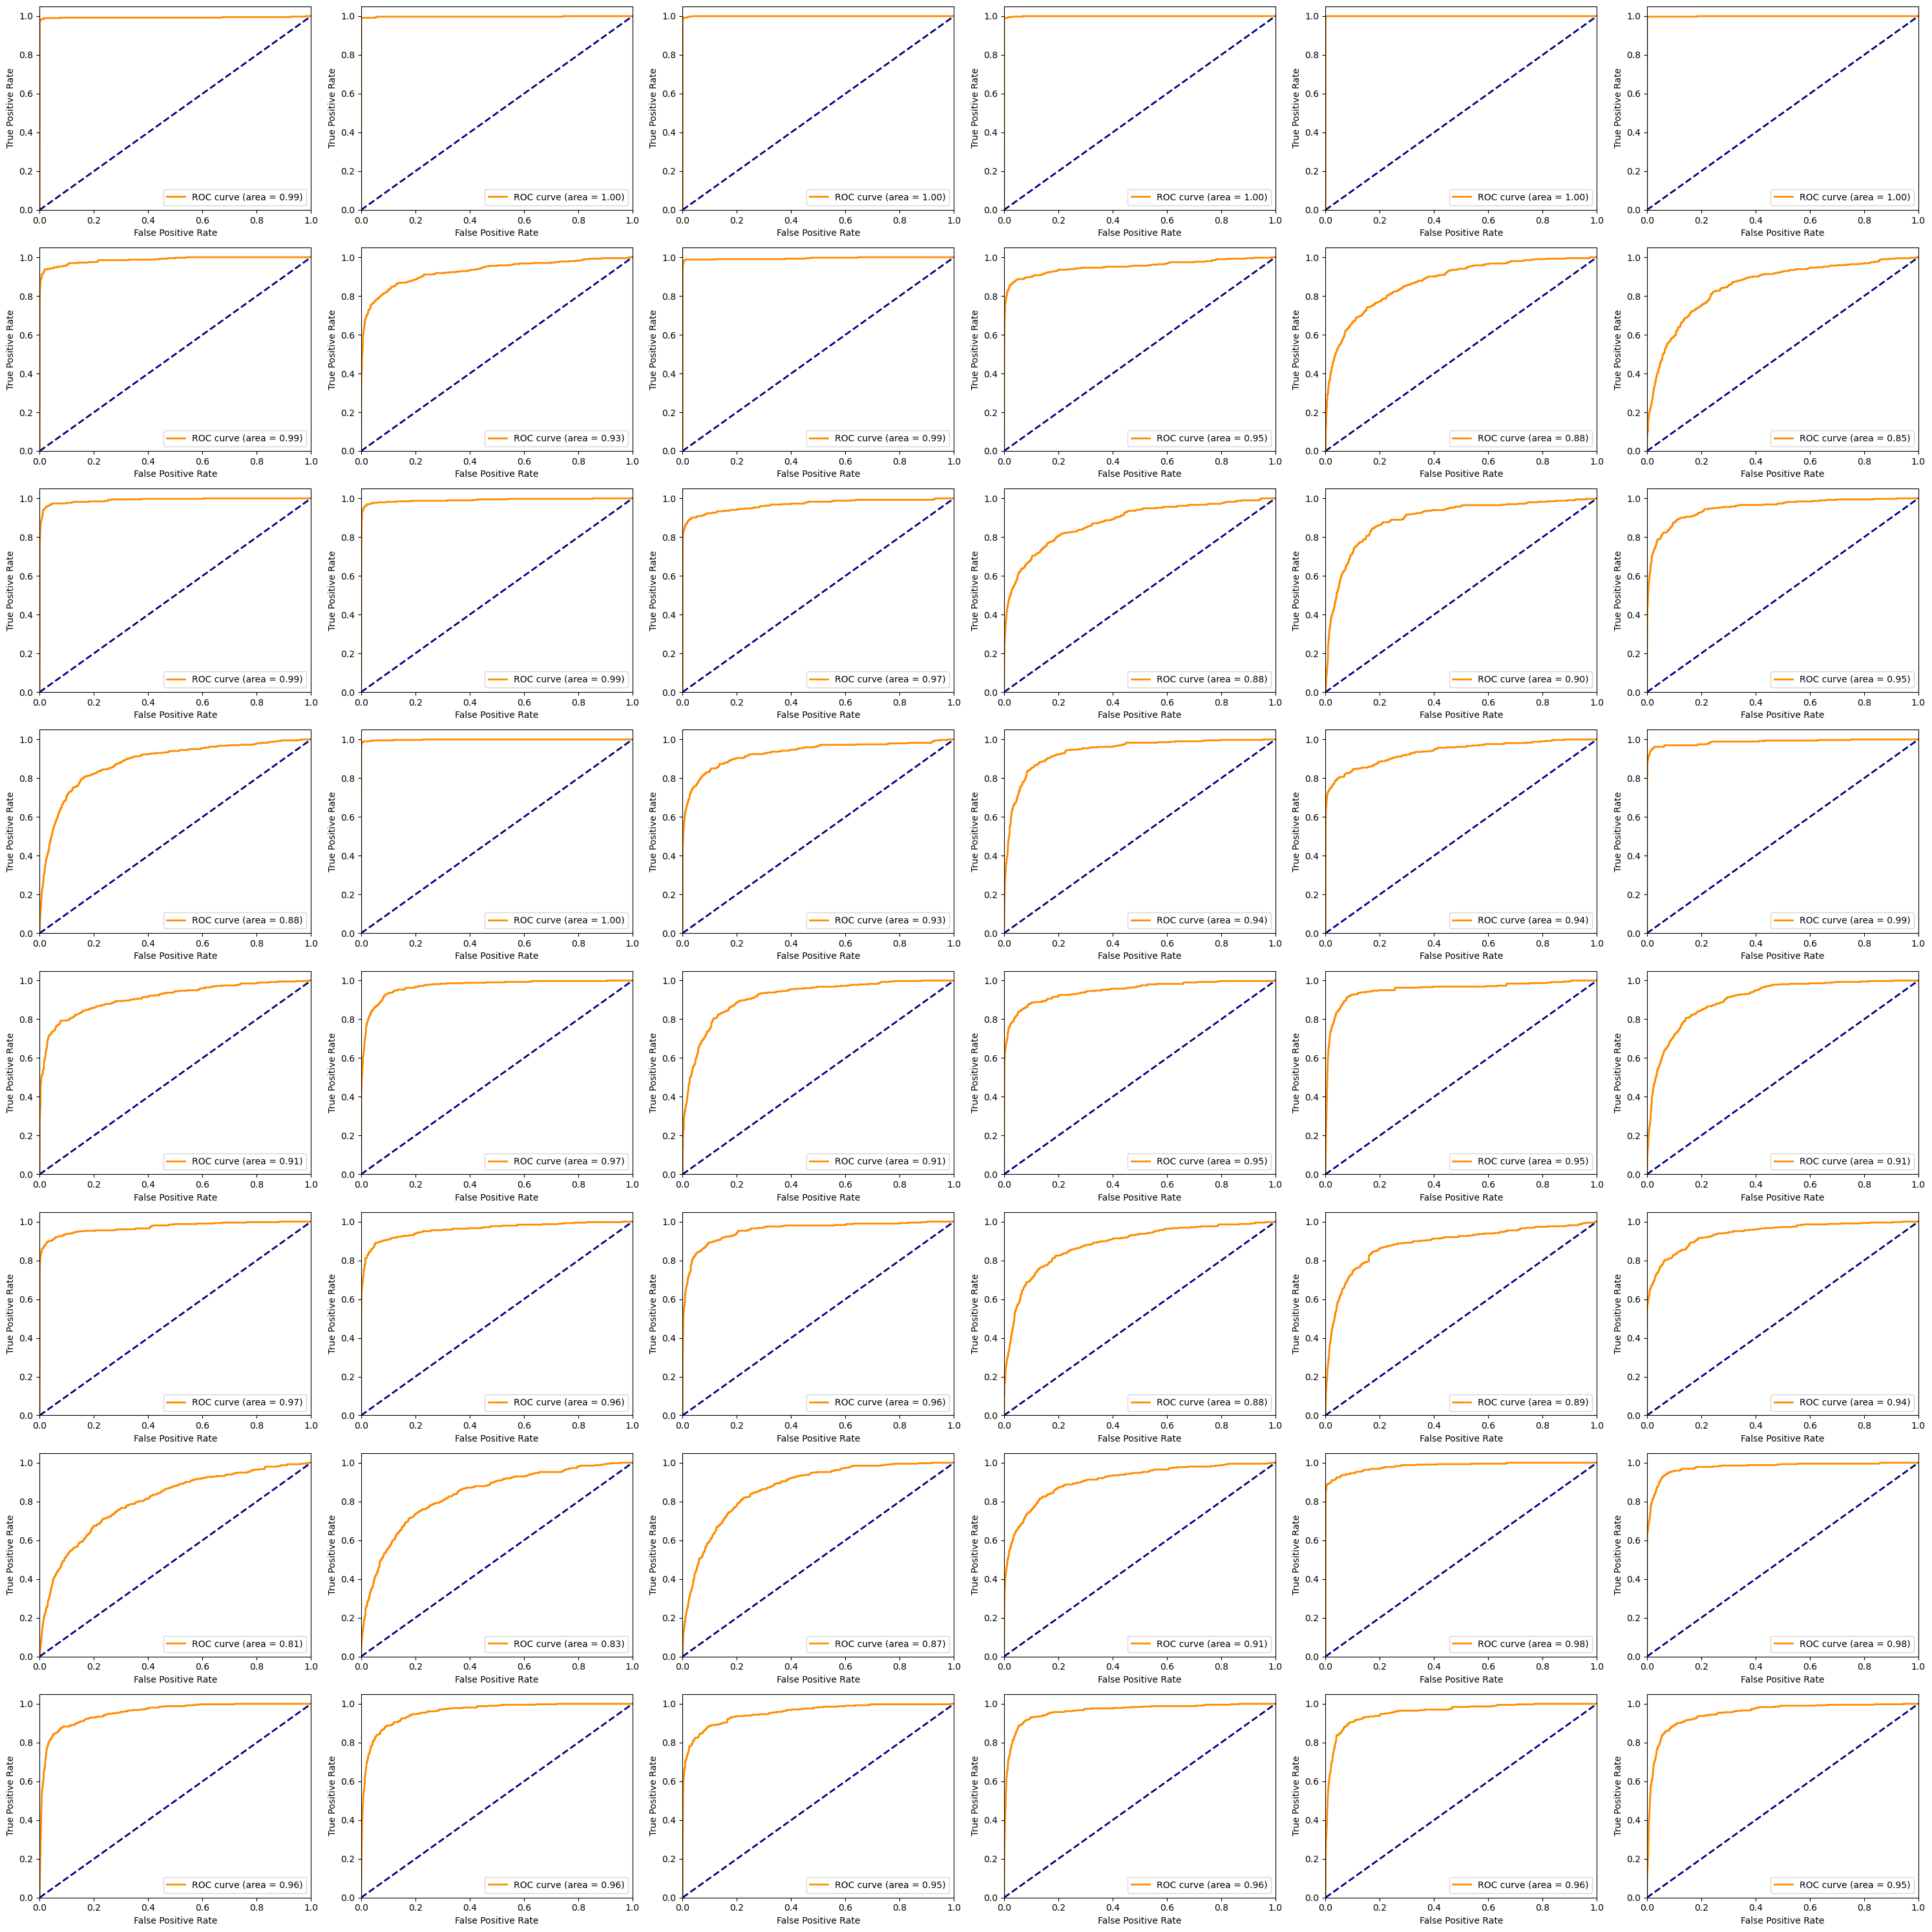

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предполагается, что y_test_binarized и y_score уже вычислены
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 48
start_class=0
# Вычисление ROC AUC для каждого класса
for i in range(start_class, start_class + n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Создание фигуры для подграфиков
fig, axes = plt.subplots(8, 6, figsize=(30, 30))  # Размер фигуры можно настроить
axes = axes.ravel()  # Преобразование матрицы осей в плоский массив

for i in range(start_class, start_class + n_classes):
    axes[i].plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    #axes[i].set_title(f'Receiver Operating Characteristic for class {i}')
    axes[i].legend(loc="lower right")

plt.tight_layout()  # Автоматическая корректировка подграфиков для предотвращения наложения
plt.show()


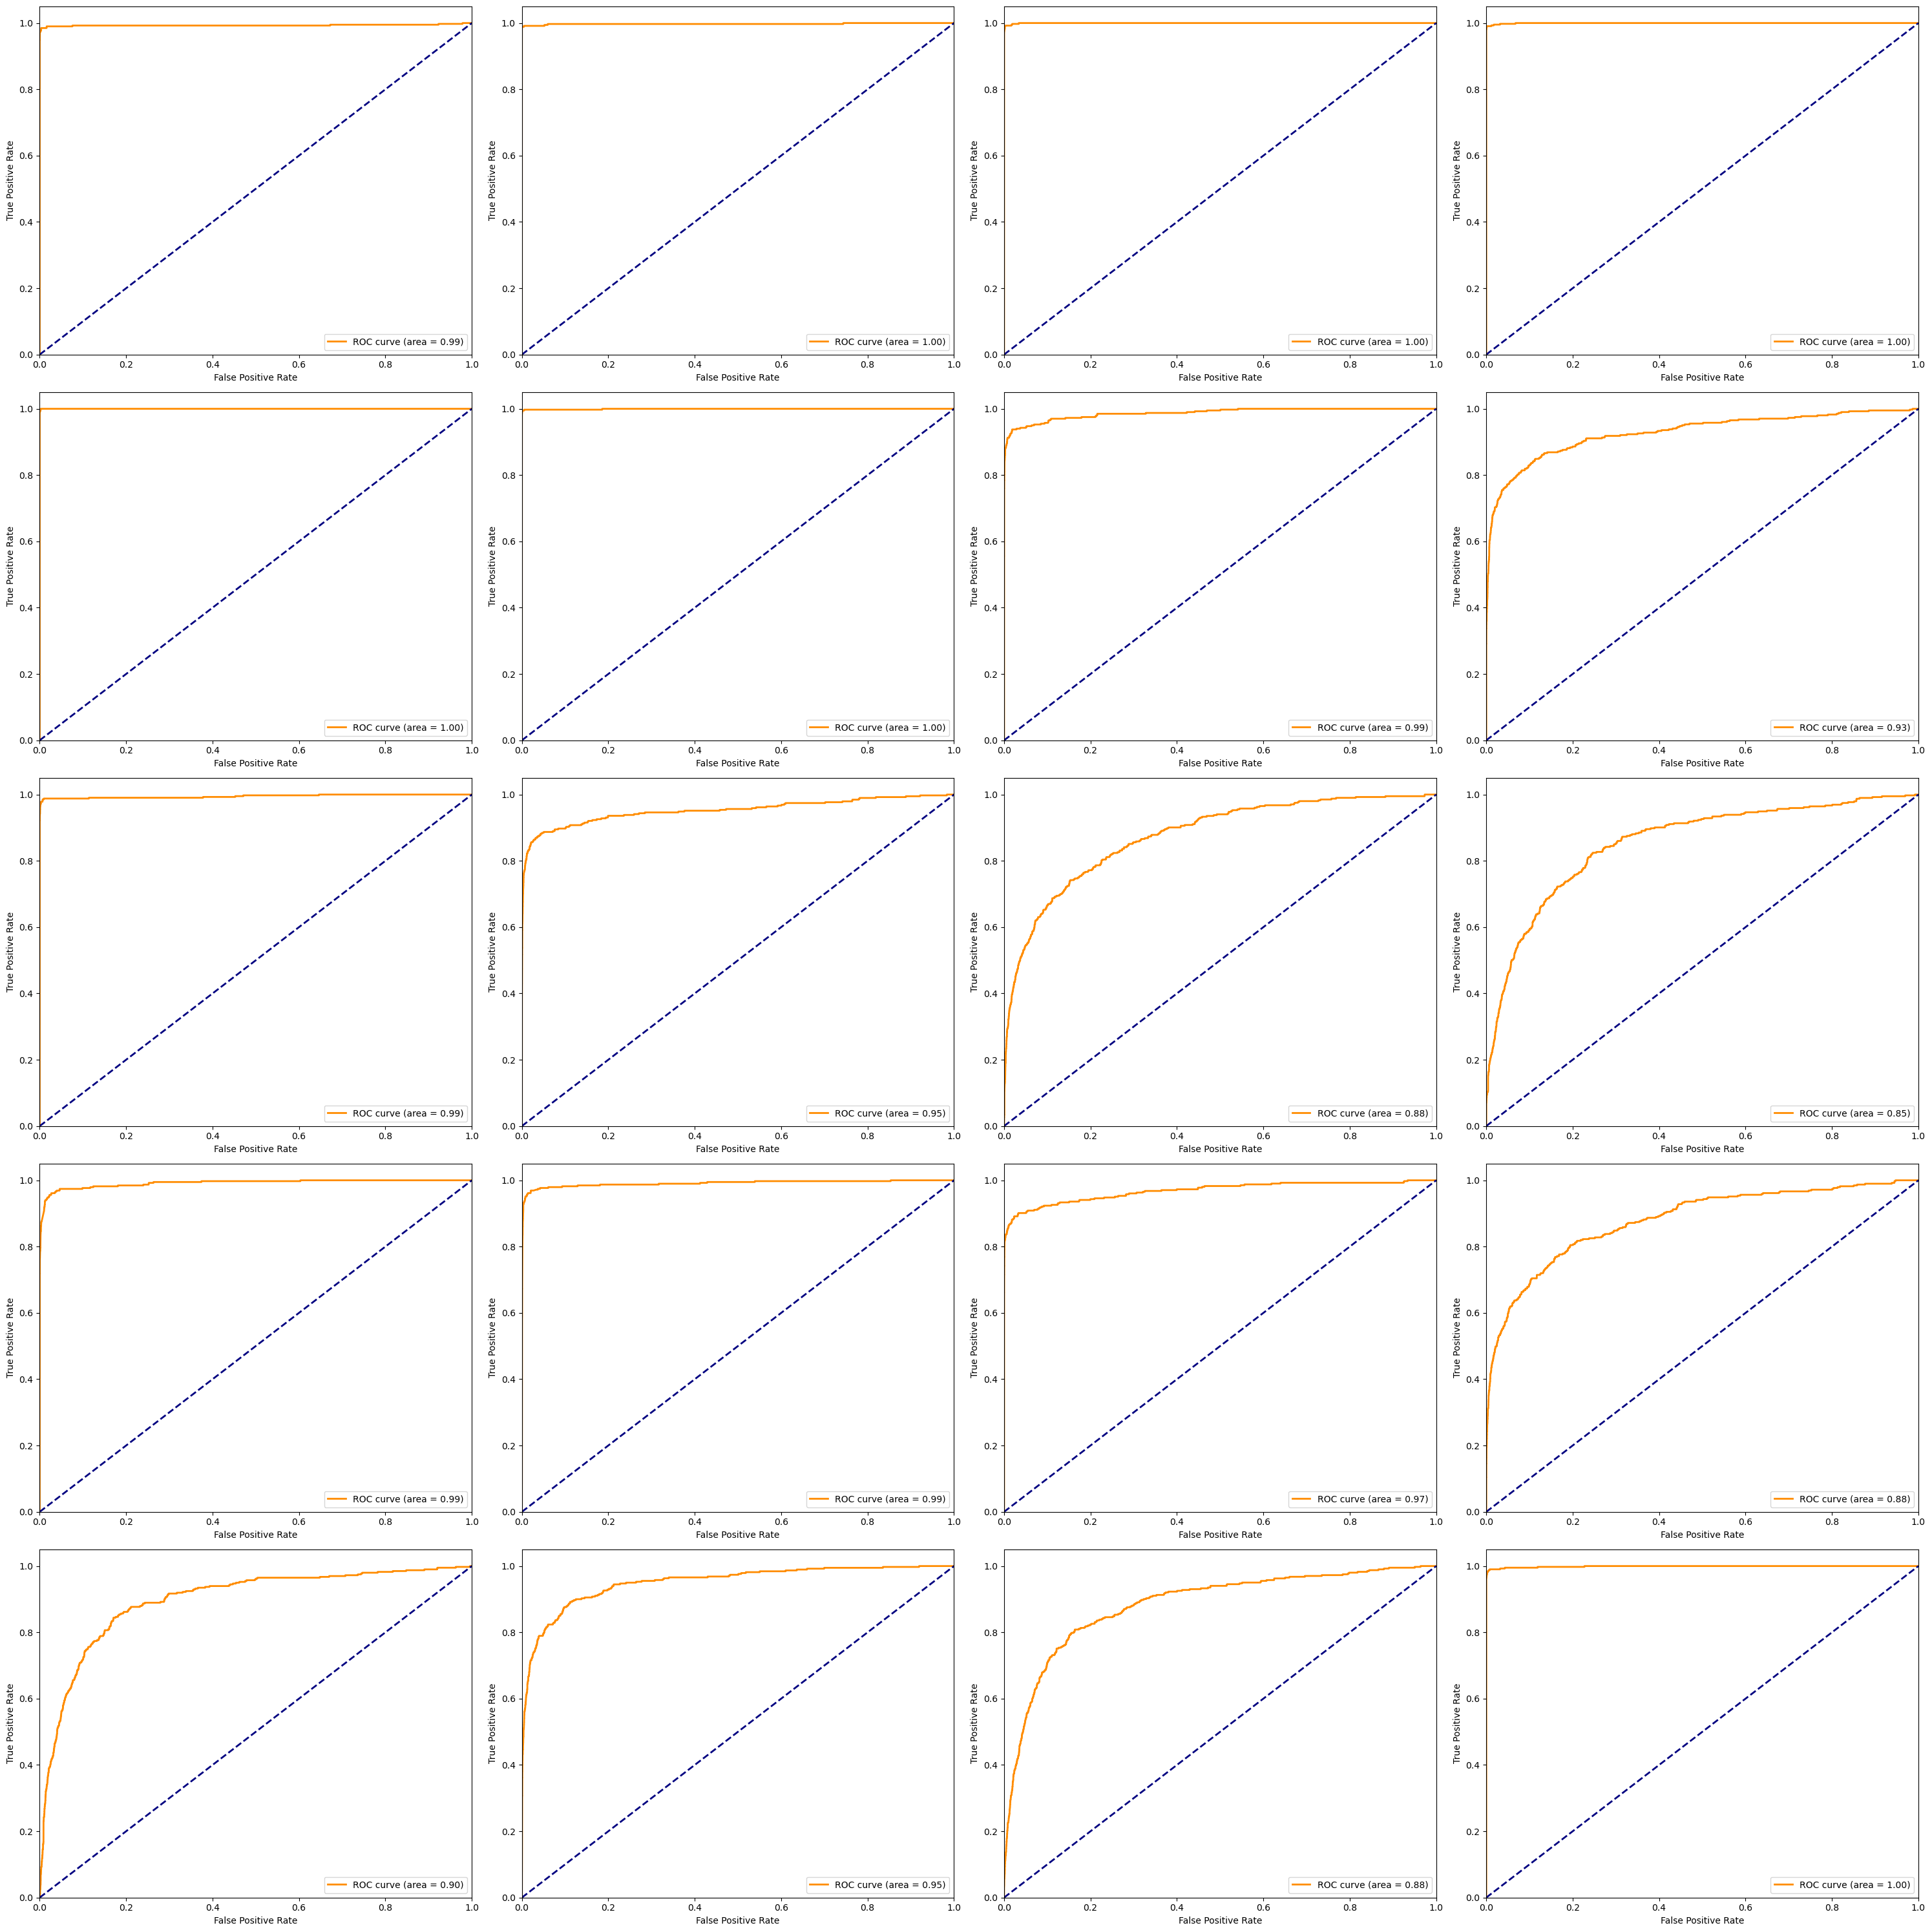

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предполагается, что y_test_binarized и y_score уже вычислены
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 20
start_class=0
# Вычисление ROC AUC для каждого класса
for i in range(start_class, start_class + n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Создание фигуры для подграфиков
fig, axes = plt.subplots(5, 4, figsize=(30, 30))  # Размер фигуры можно настроить
axes = axes.ravel()  # Преобразование матрицы осей в плоский массив

for i in range(start_class, start_class + n_classes):
    axes[i].plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    #axes[i].set_title(f'Receiver Operating Characteristic for class {i}')
    axes[i].legend(loc="lower right")

plt.tight_layout()  # Автоматическая корректировка подграфиков для предотвращения наложения
plt.show()